# Milestone 4 - Regression Simulation 

## Author - Alex Bogdanov



## Instructions

Milestone 4 is where everything you built in the previous milestones comes together. For this Milestone, you focus on improving model accuracy and summarizing your findings. Try explaining your findings as if you are presenting to your management team in layman’s terms. For example, talk about the influencing factors, what can be improved, what is important in your findings, what is the key aspect to focus on, what do the data tell them that they do not know.

For Milestone 4 you should

- update Milestones 1 through 3, and assignment 9 based on feedback;

- enhance your model results by trying different model and/or data enhancement techniques (Build 3 models with different enhancements and feature engineering techniques);

- explain your choice of model and model accuracy; and

- draw direct inferences and conclusions from model results (describe how your model results can improve or provide a solution to the problem you have chosen). Use graphs and evidence from the data to prove your point. Part of being a data scientist is to tell a story that helps the business.



# Dataset: <a name="dataset"></a>
This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.
Csv with the data can be found [here](https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/kc_house_data.csv)


# What are we trying to achieve?
A new local real estate startup is emerging, would try to compete with Redfin or Zillow in King County. One of the crucial needs is to be able to estimate house value based on various features. They are hiring me to come up with a predictive model and see how accurate it can be.


Lets tune some formating, load necessary libraries, load dataset and show its head.
Also, will print out summary statistics.

In [1]:
import pandas as pd, numpy as np
pd.set_option('display.notebook_repr_html', True)
def _repr_latex_(self):  return f'\centering{self.to_latex()}'
pd.DataFrame._repr_latex_ = _repr_latex_
## !pip install ipypublish 
#from ipypublish import nb_setup
#pd = nb_setup.setup_pandas(escape_latex=False)

In [2]:
# Load necessary libraries
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# Location of dataset
df = pd.read_csv('https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/kc_house_data.csv')

# shortening column names to better fit in PDF
df.columns = ['id', 'date', 'price', 'bedrms', 'bathrms', 's_liv', 's_lot', 'floors', 'waterfr', 'view', 
    'cond', 'grade', 's_above', 's_base', 'yr_blt', 'yr_renov', 'zip','lat', 'long', 's_liv15', 's_lot15']


print(df.head())

# unofrtunately, this does not print nicely in PDF
df.describe().round(1)

           id             date     price  bedrms  bathrms  s_liv  s_lot  \
0  7129300520  20141013T000000  221900.0       3     1.00   1180   5650   
1  6414100192  20141209T000000  538000.0       3     2.25   2570   7242   
2  5631500400  20150225T000000  180000.0       2     1.00    770  10000   
3  2487200875  20141209T000000  604000.0       4     3.00   1960   5000   
4  1954400510  20150218T000000  510000.0       3     2.00   1680   8080   

   floors  waterfr  view  ...  grade  s_above  s_base  yr_blt  yr_renov  \
0     1.0        0     0  ...      7     1180       0    1955         0   
1     2.0        0     0  ...      7     2170     400    1951      1991   
2     1.0        0     0  ...      6      770       0    1933         0   
3     1.0        0     0  ...      7     1050     910    1965         0   
4     1.0        0     0  ...      8     1680       0    1987         0   

     zip      lat     long  s_liv15  s_lot15  
0  98178  47.5112 -122.257     1340     5650  
1  9

,id,price,bedrms,bathrms,s_liv,s_lot,floors,waterfr,view,cond,grade,s_above,s_base,yr_blt,yr_renov,zip,lat,long,s_liv15,s_lot15
count,2.161300e+04,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0
mean,4.580302e+09,540088.1,3.4,2.1,2079.9,15107.0,1.5,0.0,0.2,3.4,7.7,1788.4,291.5,1971.0,84.4,98077.9,47.6,-122.2,1986.6,12768.5
std,2.876566e+09,367127.2,0.9,0.8,918.4,41420.5,0.5,0.1,0.8,0.7,1.2,828.1,442.6,29.4,401.7,53.5,0.1,0.1,685.4,27304.2
min,1.000102e+06,75000.0,0.0,0.0,290.0,520.0,1.0,0.0,0.0,1.0,1.0,290.0,0.0,1900.0,0.0,98001.0,47.2,-122.5,399.0,651.0
25%,2.123049e+09,321950.0,3.0,1.8,1427.0,5040.0,1.0,0.0,0.0,3.0,7.0,1190.0,0.0,1951.0,0.0,98033.0,47.5,-122.3,1490.0,5100.0
50%,3.904930e+09,450000.0,3.0,2.2,1910.0,7618.0,1.5,0.0,0.0,3.0,7.0,1560.0,0.0,1975.0,0.0,98065.0,47.6,-122.2,1840.0,7620.0
75%,7.308900e+09,645000.0,4.0,2.5,2550.0,10688.0,2.0,0.0,0.0,4.0,8.0,2210.0,560.0,1997.0,0.0,98118.0,47.7,-122.1,2360.0,10083.0
max,9.900000e+09,7700000.0,33.0,8.0,13540.0,1651359.0,3.5,1.0,4.0,5.0,13.0,9410.0,4820.0,2015.0,2015.0,98199.0,47.8,-121.3,6210.0,871200.0


The ```desribe``` output from above gives us the basic idea about our data. For example:

- s_liv and s_lot is *very* skewed (mean is much more closer to min than max) 

- Majority of houses do not have waterfront view (waterfr = 0 for 25%, 50% and 75%)

The visual picture would be better for analysis , will plot histograms soon.

Lets go over columns description:

Column | Info
--- | --- 
id | Unique ID
date | Date of sale 
price | Sale Price 
bedrms | # of bedrooms
bathrms | # of bathrooms (0.5 - no shower)
s_liv|  Area of interior living space
s_lot |  Area of land space
floors | # of floors
waterfr | Overlooking the waterfront or not
view | Index 0 to 4 how good the view is
cond| Condition: Index 1 to 5
grade| 1 to 13 construction grade
s_above | Area of living space above the ground level
s_base | Area of living space below the ground level
yr_built | Year built
yr_renov | Year of last renovation
zip| Zipcode
lat |  Lattitude
long | Longitude
s_living15 | Nearest 15 neighbors living space 
s_lot15 | Nearest 15 neighbors  lot area





Lets double check we don't have missing values. We expect to see zeros for both "NA" and "Missing".

In [3]:
    
#missing data
missing_data = pd.concat([df.isna().sum(), df.isnull().sum()], axis=1, keys=['NA', 'Missing'])
print(f'Missing or NA values:')
print(missing_data.sum())


Missing or NA values:
NA         0
Missing    0
dtype: int64


Lets plot out all histograms to take a quick look at data distribution; Will try to squeeze 5 figures at a row so it won't take up 2 pages, we have too many parameters.

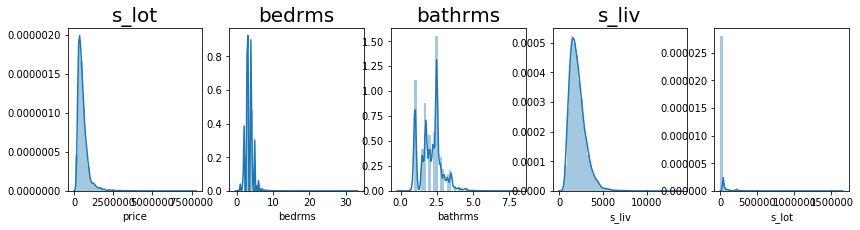

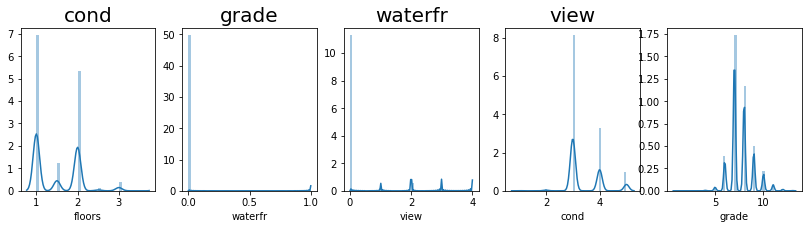

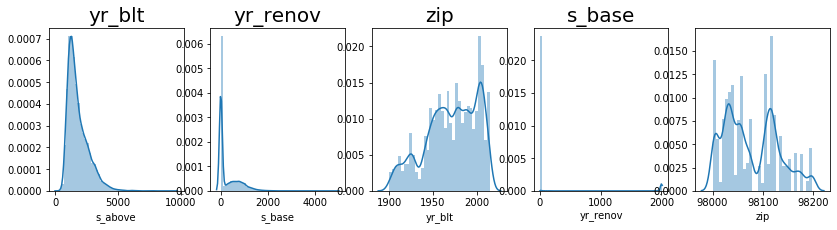

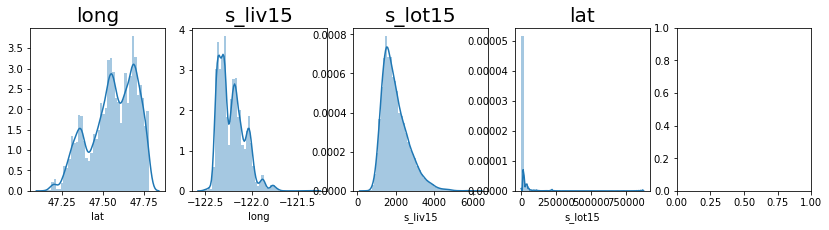

In [4]:
j= 0 
for i, col in enumerate(df.columns):
    if col not in ['date', 'id']:
        if not j%5:
            fig, ax = plt.subplots(1,5, figsize=(14, 3))
        sns.distplot(df[col], ax=ax[j%5])
        #ax.xaxis.set_major_formatter(ticker.EngFormatter())
        ax[j%4].set_title(col, fontsize=20)
        #df.hist(col)
        j += 1

The conclusions are:
- We have some features that looks normally distributed, but very skewed (```price, s_liv, s_lot15, s_liv15,  s_lot, s_above```). Will try to address this on the next block.
- Zipcode, lattitude and longitude (```zip, long, lat```) have complicated distributions with multiple peaks. We should not use it with linear regression.
- We have lots of discrete features with low cardinality (```bathrms, bedrms, cond, grade, waterft,view```). It hard to make sense form these plots for them. Box plots will give us better insights on those. 

Let's address  skewed distributions with large tails(```price, s_liv, s_lot15, s_liv15,  s_lot, s_above```). I'll show it is useful to apply log transformation to normalize distributions of the following features:


We'll compare before and after plots:

Creating log features...


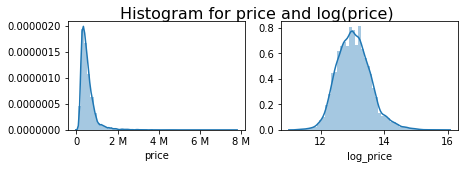

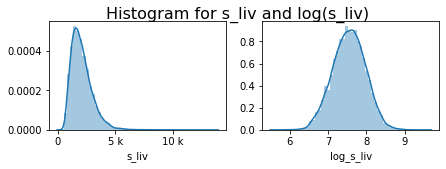

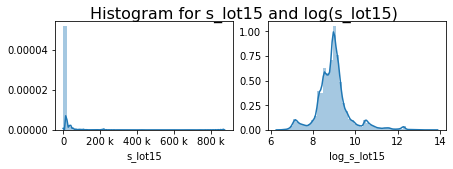

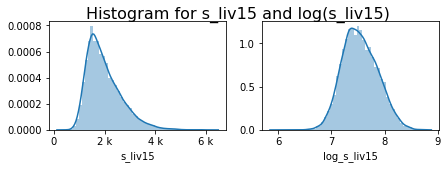

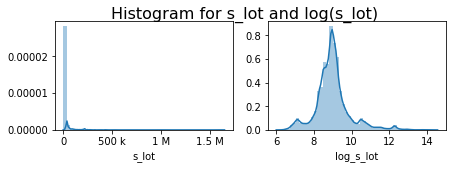

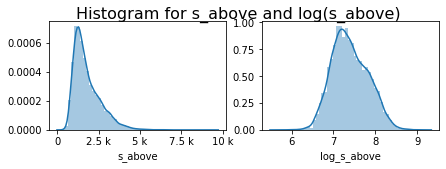

In [5]:
import matplotlib.ticker as ticker
print('Creating log features...')
need_log = need_log = ('price', 's_liv', 's_lot15', 's_liv15','s_lot', 's_above')
log_columns = []
for name in need_log:
    df['log_'+name] = np.log(df[name])
    log_columns.append('log_'+name)
    fig, ax = plt.subplots(1,2, figsize=(7, 2))
    fig.suptitle( f'Histogram for {name} and log({name})', fontsize=16)
    sns.distplot(df[name], ax=ax[0])
    sns.distplot(df['log_'+name], ax=ax[1])
    ax[0].xaxis.set_major_formatter(ticker.EngFormatter())

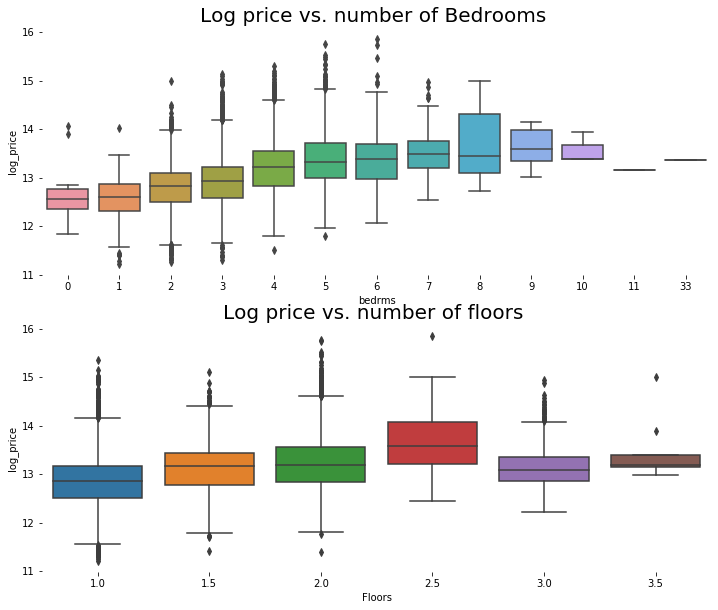

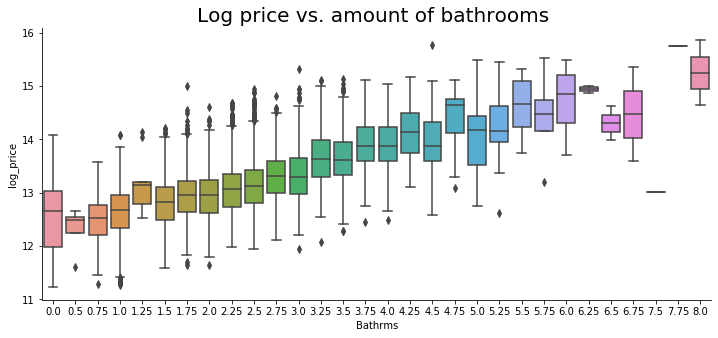

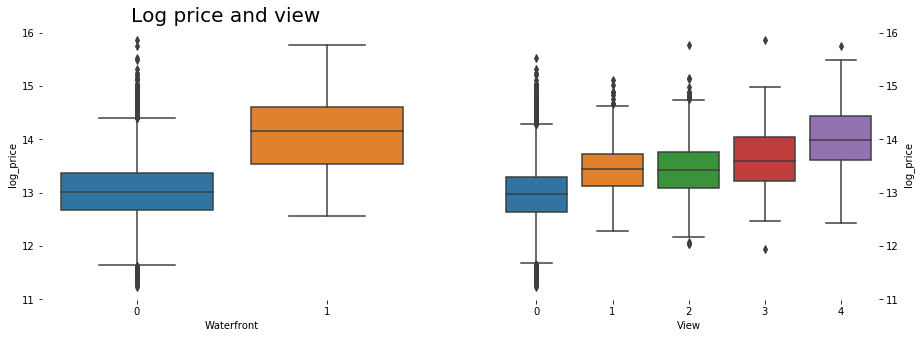

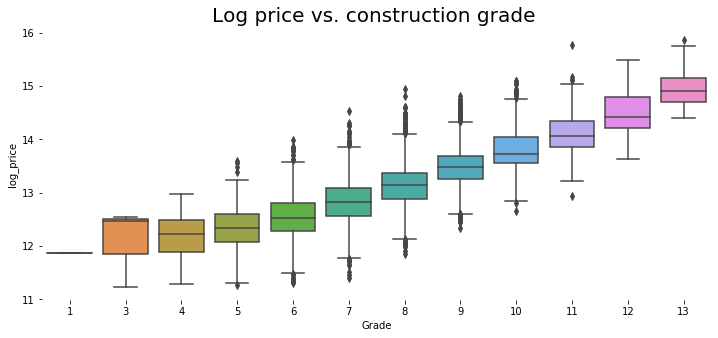

In [6]:
# ----------------------------------------
f, axes = plt.subplots(2, 1,figsize=(12,10))
sns.boxplot(x=df['bedrms'],y=df['log_price'], ax=axes[0])
sns.boxplot(x=df['floors'],y=df['log_price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set_title('Log price vs. number of Bedrooms ', fontsize=20)
axes[0].set(xlabel='bedrms', ylabel='log_price')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("left")
axes[1].set(xlabel='Floors', ylabel='log_price')
axes[1].set_title('Log price vs. number of floors ', fontsize=20)
axes[0].yaxis.set_major_formatter(ticker.EngFormatter())
axes[1].yaxis.set_major_formatter(ticker.EngFormatter())

# ----------------------------------------
f, axe = plt.subplots(1, 1,figsize=(12,5))
sns.despine(left=True, bottom=True)
sns.boxplot(x=df['bathrms'],y=df['log_price'], ax=axe)
axe.yaxis.tick_left()
axe.set_title('Log price vs. amount of bathrooms ', fontsize=20)
axe.set(xlabel='Bathrms', ylabel='log_price');
axe.yaxis.set_major_formatter(ticker.EngFormatter())
axe.spines['left'].set_visible(True)
axe.spines['bottom'].set_visible(True)

# ----------------------------------------
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=df['waterfr'],y=df['log_price'], ax=axes[0])
sns.boxplot(x=df['view'],y=df['log_price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Waterfront', ylabel='log_price')
axes[0].set_title('Log price with and without waterfront proximity ', fontsize=20)
axes[0].yaxis.tick_left()
axes[0].yaxis.set_visible(True)

# ----------------------------------------
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='View', ylabel='log_price')
axes[0].set_title('Log price and view  ', fontsize=20)
axes[0].yaxis.set_major_formatter(ticker.EngFormatter())
axes[1].yaxis.set_major_formatter(ticker.EngFormatter())

# ----------------------------------------
f, axe = plt.subplots(1, 1,figsize=(12,5))
sns.boxplot(x=df['grade'],y=df['log_price'], ax=axe)
sns.despine(left=True, bottom=True)
axe.yaxis.tick_left()
axe.set_title('Log price vs. construction grade ', fontsize=20)
axe.set(xlabel='Grade', ylabel='log_price');
axe.yaxis.set_major_formatter(ticker.EngFormatter())


We can conclude, that the price has positive correlation with these discrete features. Price growth almost monotonically with the feature increase. There are some anomalies, like having 3 and 3.5 floors is not helping to increase the price, compared to 2.5  

The next  chart gives insight on correlation either:  the correlation matrix. It would help us to weed out features that would not help our linear regression. The higher the index is, the stronger is the correlation.


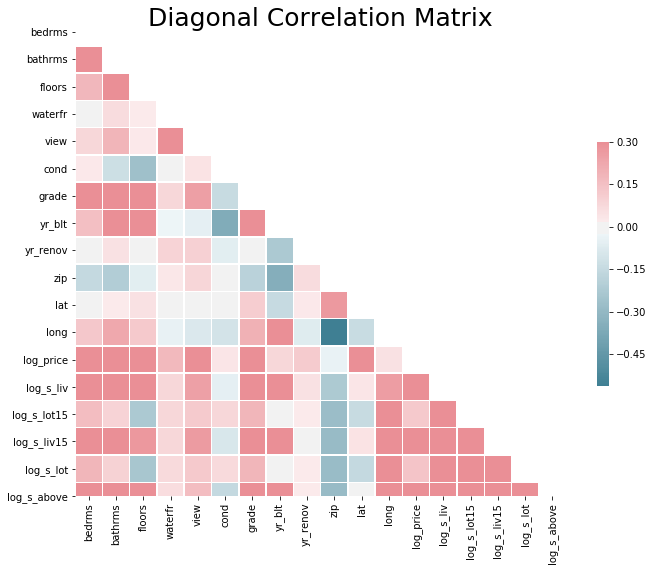

In [7]:
features = ['bedrms','bathrms','floors','waterfr',
            'view','cond','grade','yr_blt','yr_renov',
            'zip','lat','long'] + log_columns

corr = df[features].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
plt.title('Diagonal Correlation Matrix',fontsize=25)
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

This tells us, we don't want to use Zipcode for the regression.

Next step we look at the date of sale and plot 30 days running average house sale price.

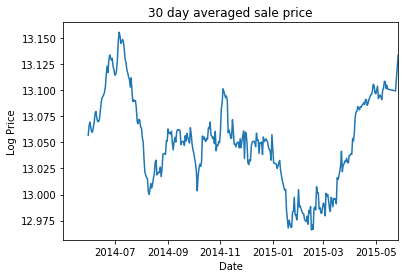

Yearly log price variation: 0.19
Log price standard deviation: 0.53


In [8]:
# converting date to datetime format
df['date'] = pd.to_datetime(df['date'])    

fig = plt.figure()
daily_average_sale = df.groupby(by=df['date'].dt.date)['log_price'].mean()
running_30_days_avg_sale = daily_average_sale.rolling(window=30).mean()
running_30_days_avg_sale.plot()
plt.ylabel('Log Price')
plt.xlabel('Date')
plt.title('30 day averaged sale price')
plt.show()

print(f'Yearly log price variation: {np.max(running_30_days_avg_sale) - np.min(running_30_days_avg_sale):.2f}')
print(f'Log price standard deviation: {np.std(df["log_price"]):.2f}')




We can see a seasonal trend, but we can't measure it for sure since we only have 1 year date. I will run two regressions: one without using date, and one using one hot encoding for month, will see if it makes it better.

That brings us to the features we are going to use. We use all features, except for

- id (non informative)
- date (as we've discussed)
- all features, that we switched to Log

Namely:

In [9]:
features = ['bedrms', 'bathrms', 'floors','waterfr', 'view', 'cond', 'grade', 'yr_blt',
       'yr_renov', 'lat', 'long', 's_liv15', 'log_s_lot15', 
            'log_s_liv15', 'log_s_lot', 'log_s_above']
X = df[features]
Y = df['log_price']

Split into typical 80%/20% train and test set.

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

There are different ways to do the linear regression in python, we will use <mark>statsmodels</mark> library, since it gives us a some statistics we can go through. 

Lets add constant to the regression, train the model, print out statistics and accuracy score for both train and test data. We will print out whole statistics table to figure out P values for the coefficients. This will help us understand, if some of the factors should be 0.

In [11]:
print('Ordinary Least Squares regression from statsmodels')
import statsmodels.api as sm
from statsmodels.tools import tools
# adding constant, since not added by default
model = sm.OLS(y_train, tools.add_constant(x_train))
results = model.fit()
print(results.summary())


from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept=True)
regressor.fit(x_train, y_train)

print('Accuracy score on train data: %.2f' % (regressor.score(x_train, y_train)))
print('Accuracy score test on test: %.2f' % (regressor.score(x_test, y_test)))

Ordinary Least Squares regression from statsmodels
                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     3460.
Date:                Thu, 14 May 2020   Prob (F-statistic):               0.00
Time:                        01:36:28   Log-Likelihood:                -969.87
No. Observations:               17290   AIC:                             1974.
Df Residuals:                   17273   BIC:                             2106.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

/Users/sash/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Lets take a look at the P-value column in the summary table. High value indicates, that we don't need corresponding coefficient (test the null hypothesis of this coefficient to be equal to 0). In our case bedrms has P value of 0.484 and  for s_liv15 P=0.112
Lets redo the regression without ```bedrms``` and ```s_liv15```.

We won't print out the whole summary anymore, will be checking R^2, RMSE scores and predictions vs actual charts.
For that we will add couple of helper-funcitons.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Train score:
R2: 0.76
RMSE: 0.26
Test score:
R2: 0.76
RMSE: 0.26


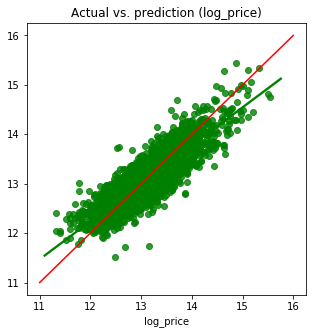

In [12]:
def get_score(prediction, lables):       
    from sklearn import ensemble, tree, linear_model
    from sklearn.model_selection import train_test_split, cross_val_score
    from sklearn.metrics import r2_score, mean_squared_error
    from sklearn.utils import shuffle

    print('R2: {:.2f}'.format(r2_score(lables, prediction )))
    print('RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(prediction, lables))))

def train_test(estimator, x_trn, x_tst, y_trn, y_tst):
    prediction_train = estimator.predict(x_trn)
    # Printing estimator
    print(estimator)
    # Printing train scores
    print("Train score:")
    get_score(prediction_train, y_trn)
    prediction_test = estimator.predict(x_tst)
    # Printing test scores
    print("Test score:")
    get_score(prediction_test, y_tst)
    ax, fig =plt.subplots(1,1,figsize=(5,5))
    ax = sns.regplot(x=y_tst, y=prediction_test, color="g")
    ax.set_title('Actual vs. prediction (log_price)')
    ax.plot((11,16),(11,16),color='r')
    plt.show()

features = ['bedrms', 'bathrms', 'floors','waterfr', 'view', 'cond', 'grade', 'yr_blt',
       'yr_renov',  'lat', 'long', 's_liv15', 'log_s_lot15', 
            'log_s_liv15', 'log_s_lot', 'log_s_above'] 
X = df[features]
Y = df['log_price']
del X['bedrms']
del X['s_liv15']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept=True)
regressor.fit(x_train, y_train)

train_test(regressor, x_train, x_test, y_train, y_test)


R^2 did not change compared to previous iteration, so we made the right chose on removing two insignificant features. The chart shows us how prediction is scattered.
For the next iteration, lets include month of sale into the prediction and see if it makes a difference. We will use one hot encoding for the month

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Train score:
R2: 0.76
RMSE: 0.25
Test score:
R2: 0.76
RMSE: 0.26


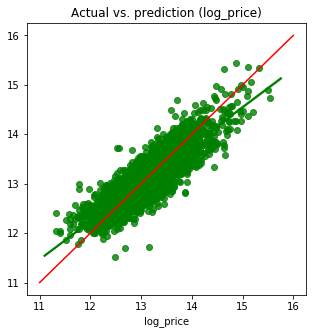

In [13]:
df['month'] = pd.DatetimeIndex(df['date']).month
#one hot month
one_hot = pd.get_dummies(df['month'])
months = ['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12']
one_hot.columns = months
# Drop column Month as it is now encoded
df = df.drop('month',axis = 1)
# Join the encoded df
df = df.join(one_hot)

features = ['bedrms', 'bathrms', 'floors','waterfr', 'view', 'cond', 'grade', 'yr_blt',
       'yr_renov',  'lat', 'long', 's_liv15', 'log_s_lot15', 
            'log_s_liv15', 'log_s_lot', 'log_s_above'] + months
X = df[features]
Y = df['log_price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
    

from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept=True)
regressor.fit(x_train, y_train)

train_test(regressor, x_train, x_test, y_train, y_test)


R^2 score did not change (0.76), so including month did not make a difference. RMSE reduced a little bit (0.26->0.25). RMSE stands for residual error.
For the last iteration, lets use Gradient Boosting regression (a machine learning technique) to see the power of advanced technique.

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.05, loss='huber', max_depth=3,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=15, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=3000,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
Train score:
R2: 0.92
RMSE: 0.15
Test score:
R2: 0.90
RMSE: 0.17


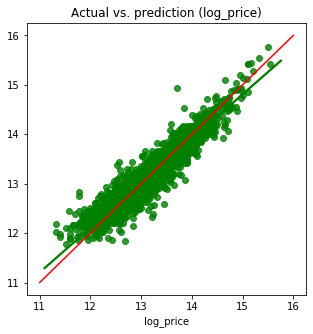

In [14]:
    from sklearn import ensemble, tree, linear_model
    GBest = ensemble.GradientBoostingRegressor(n_estimators=3000, 
                                               learning_rate=0.05, 
                                               max_depth=3, 
                                               max_features='sqrt',
                                               min_samples_leaf=15, 
                                               min_samples_split=10, 
                                               loss='huber').fit(x_train, y_train)

    train_test(GBest, x_train, x_test, y_train, y_test)

Wow, thats impressive. R^2 went up to 0.92 and residuals variability  got reduced almost two times (which can be also seen on the figure, the scatter is much less). Note, that test score is not that good as train, that is saying that the model might be over fitted.


# What did we learn:
For our purpose, predicting house price in king county,  using linear regression would not be a good choice and probably our real estate startup would fail. We  can get much better result using ML technique.